In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv(r"D:\Insurance\backend\ml\insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

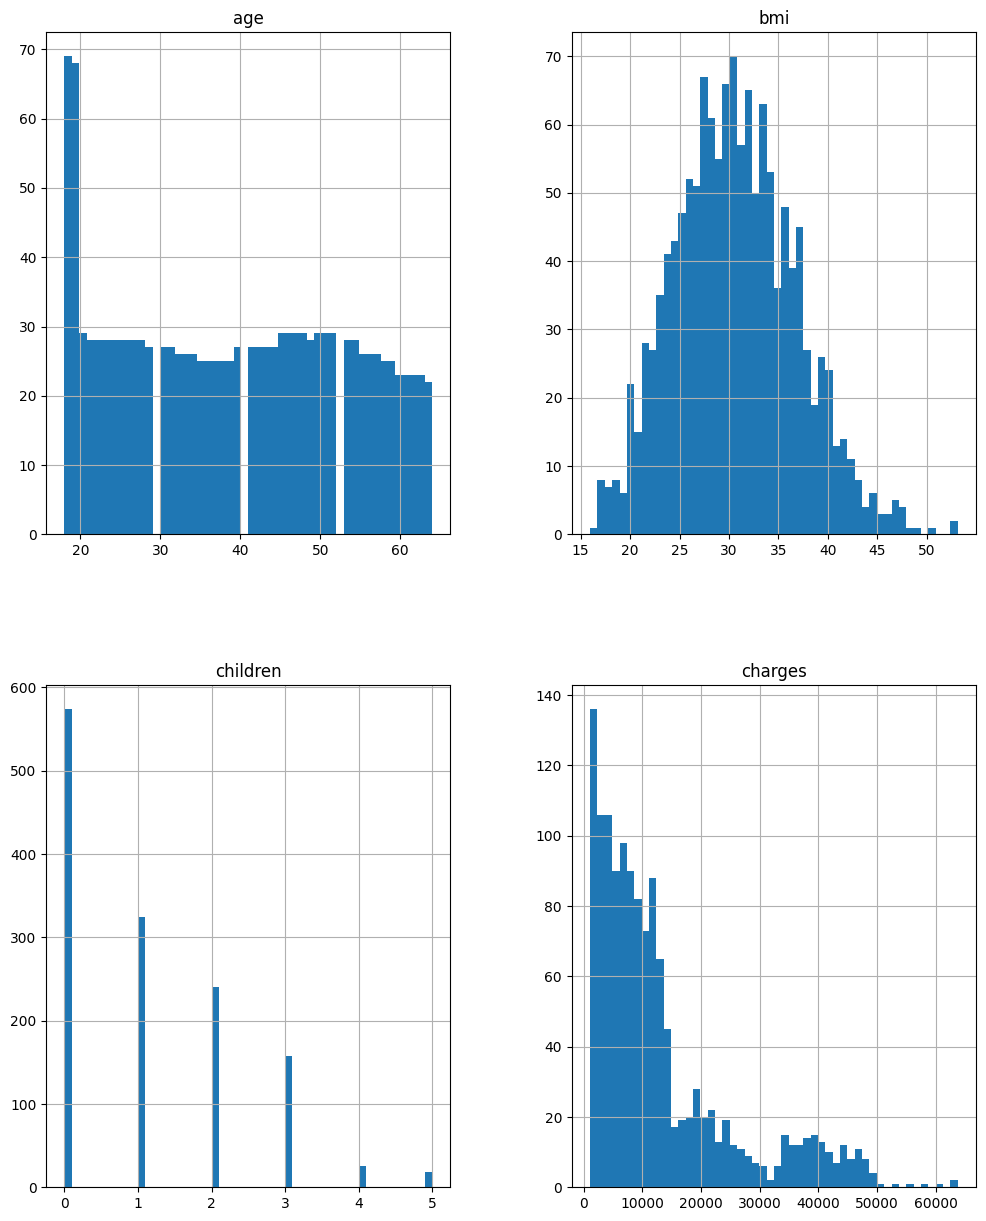

In [9]:
data.hist(bins=50,figsize=(12,15))
plt.show()

In [10]:
data_num=data.select_dtypes(include=[np.number])
corr_matrix=data_num.corr()
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

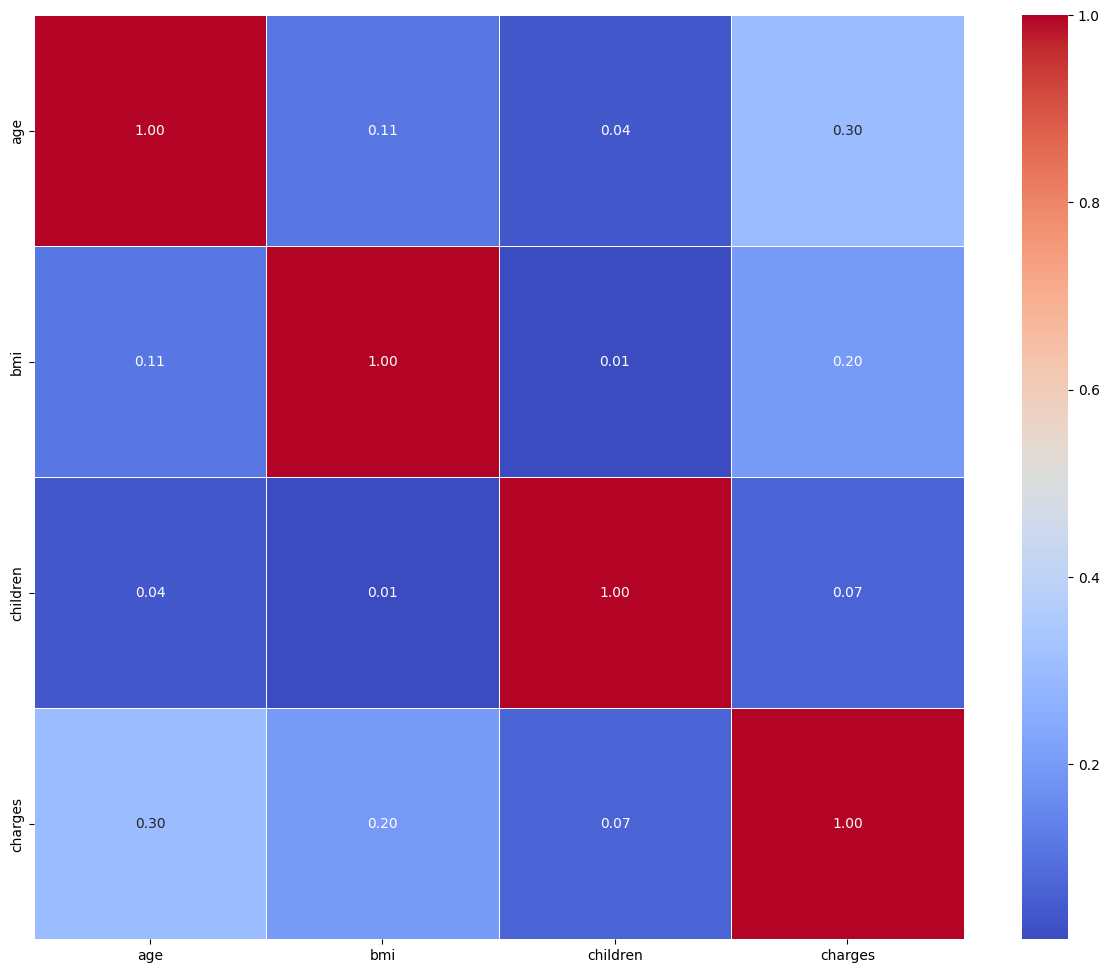

In [11]:
import seaborn as sns
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt='.2f',cmap='coolwarm')
plt.show()

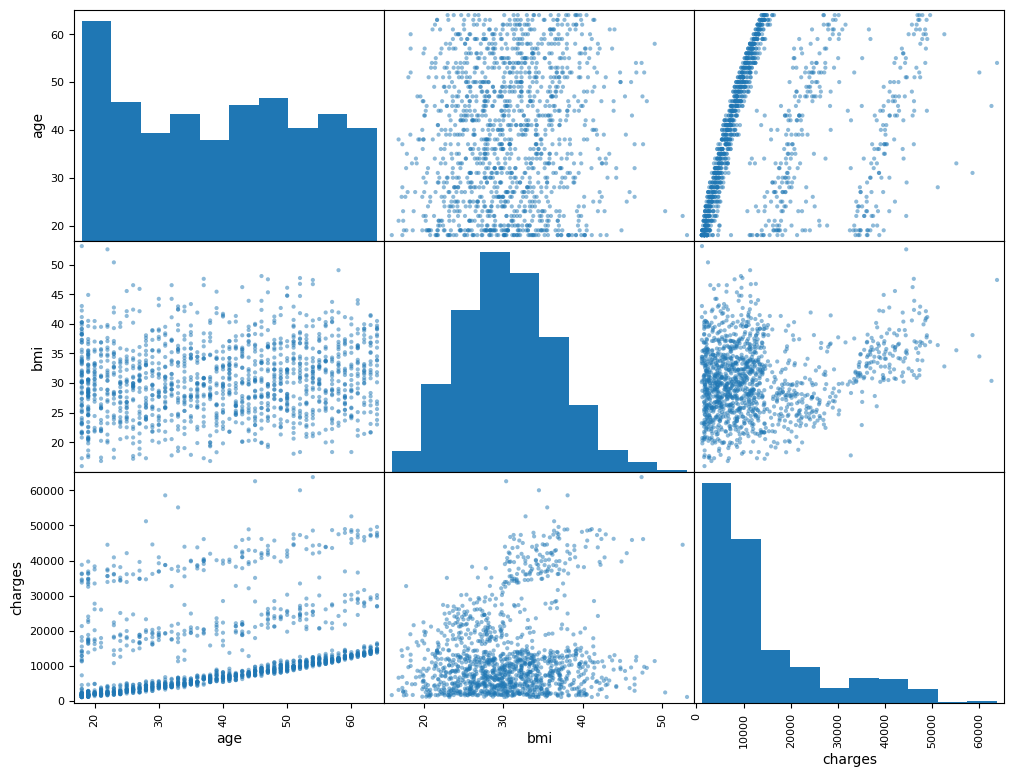

In [12]:
from pandas.plotting import scatter_matrix
attributes=['age','bmi','charges']
scatter_matrix(data[attributes],figsize=(12,9))
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(data,test_size=0.2,random_state=42)

In [14]:
X_train=train_set.drop('charges',axis=1)
X_test=test_set.drop('charges',axis=1)

Y_train=train_set['charges']
Y_test=test_set['charges']

In [15]:
data=X_train.copy()

In [16]:
data.head()

,age,sex,bmi,children,smoker,region
560,46,female,19.95,2,no,northwest
1285,47,female,24.32,0,no,northeast
1142,52,female,24.86,0,no,southeast
969,39,female,34.32,5,no,southeast
486,54,female,21.47,3,no,northwest


In [17]:
data.region.value_counts()

region
southeast    283
northeast    267
southwest    264
northwest    256
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
data_col=data.columns
data=encoder.fit_transform(data)
data=pd.DataFrame(data,columns=data_col)

encoder=OrdinalEncoder()
X_test_col=X_test.columns
X_test=encoder.fit_transform(X_test)
X_test=pd.DataFrame(X_test,columns=X_test_col)

In [19]:
data.head()

,age,sex,bmi,children,smoker,region
0,28.0,0.0,23.0,2.0,0.0,1.0
1,29.0,0.0,102.0,0.0,0.0,0.0
2,34.0,0.0,111.0,0.0,0.0,2.0
3,21.0,0.0,336.0,5.0,0.0,2.0
4,36.0,0.0,43.0,3.0,0.0,1.0


In [20]:
data.region.value_counts()

region
2.0    283
0.0    267
3.0    264
1.0    256
Name: count, dtype: int64

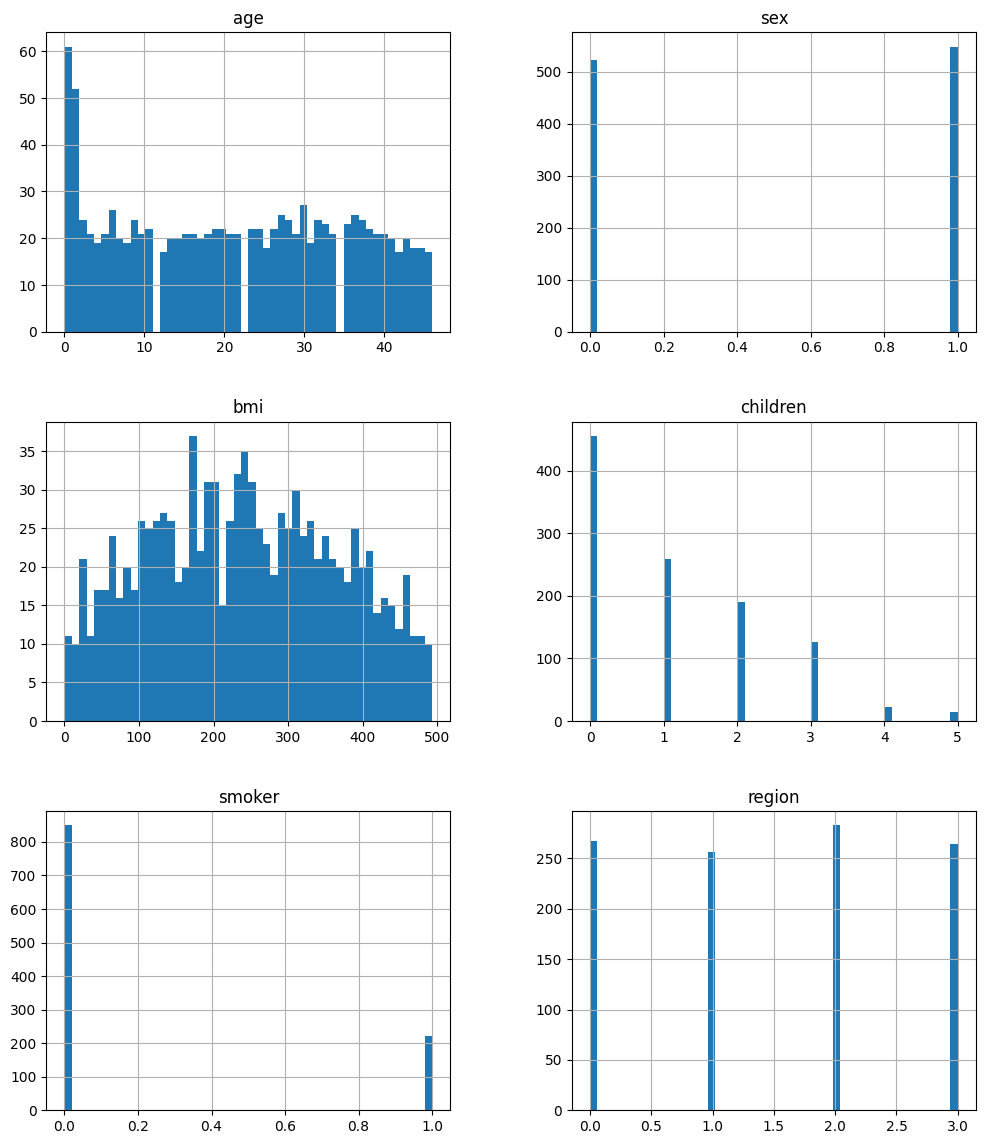

In [21]:
data.hist(bins=50,figsize=(12,14))
plt.show()

In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,drop="first")

encoded=encoder.fit_transform(data[['children']])
encoded_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out(['children']))

pd.concat([data.drop('children',axis=1),encoded_df],axis=1)

encoder=OneHotEncoder(sparse_output=False,drop="first")
encoded=encoder.fit_transform(X_test[['children']])
encoded_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out(['children']))

pd.concat([X_test.drop('children',axis=1),encoded_df],axis=1)

,age,sex,bmi,smoker,region,children_1.0,children_2.0,children_3.0,children_4.0,children_5.0
0,27.0,0.0,35.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,18.0,0.0,91.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,46.0,0.0,53.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,28.0,1.0,42.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,112.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
263,45.0,1.0,146.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
264,40.0,0.0,56.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
265,20.0,1.0,67.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
266,36.0,0.0,203.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0


In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data[['bmi','age']])
data_scaled=pd.DataFrame(data_scaled,columns=scaler.get_feature_names_out(['bmi','age']))
data=pd.concat([data.drop(columns=['bmi','age'],axis=1),data_scaled],axis=1)

scaler=StandardScaler()
X_test_scaled=scaler.fit_transform(X_test[['bmi','age']])
X_test_scaled=pd.DataFrame(X_test_scaled,columns=scaler.get_feature_names_out(['bmi','age']))
X_test=pd.concat([X_test.drop(columns=['bmi','age'],axis=1),X_test_scaled],axis=1)

In [24]:
data.head()

,sex,children,smoker,region,bmi,age
0,0.0,2.0,0.0,1.0,-1.726307,0.472227
1,0.0,0.0,0.0,0.0,-1.100713,0.543313
2,0.0,0.0,0.0,2.0,-1.029443,0.898745
3,0.0,5.0,0.0,2.0,0.752311,-0.025379
4,0.0,3.0,0.0,1.0,-1.567929,1.040918


In [25]:
X_test.head()

,sex,children,smoker,region,bmi,age
0,0.0,2.0,0.0,0.0,-1.129881,0.458596
1,0.0,0.0,0.0,1.0,-0.158007,-0.187133
2,0.0,0.0,1.0,1.0,-0.817493,1.821801
3,1.0,3.0,0.0,1.0,-1.008397,0.530343
4,1.0,0.0,1.0,1.0,0.206446,-1.406842


In [26]:
Y_train.head()

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

In [27]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

Y_train=scaler.fit_transform(Y_train.to_frame()).ravel()
Y_train=pd.DataFrame(Y_train)

Y_test=scaler.fit_transform(Y_test.to_frame()).ravel()
Y_test=pd.DataFrame(Y_test)

In [28]:
Y_train.head()

,0
0,-0.032206
1,-0.087836
2,1.480510
3,-0.082591
4,0.244739


In [29]:
Y_test.columns=['']
Y_train.columns=['']
Y_test.head()

,
0,0.050268
1,-0.266221
2,1.725553
3,0.067390
4,2.091418


In [30]:
data.head()

,sex,children,smoker,region,bmi,age
0,0.0,2.0,0.0,1.0,-1.726307,0.472227
1,0.0,0.0,0.0,0.0,-1.100713,0.543313
2,0.0,0.0,0.0,2.0,-1.029443,0.898745
3,0.0,5.0,0.0,2.0,0.752311,-0.025379
4,0.0,3.0,0.0,1.0,-1.567929,1.040918


In [31]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(data,Y_train)

pred=lin_reg.predict(X_test)

In [32]:
pred=pred.ravel()
pred.shape

(268,)

In [33]:
comp=pd.DataFrame(
    {'actual':Y_test.values.ravel(),
     'Predicted':pred}
)
comp.head()

,actual,Predicted
0,0.050268,-0.086464
1,-0.266221,-0.204031
2,1.725553,2.284232
3,0.067390,-0.031748
4,2.091418,1.484117


In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import math
print("mse: ",mean_squared_error(Y_test,pred))
print("mae: ",mean_absolute_error(Y_test,pred))
print("r2 score: ",r2_score(Y_test,pred))
# print("rmse: ",math.sqrt(mean_squared_error(Y_test,pred)))

mse:  0.23218974519021837
mae:  0.33662891777706083
r2 score:  0.781785796524042


In [35]:
X_test

,sex,children,smoker,region,bmi,age
0,0.0,2.0,0.0,0.0,-1.129881,0.458596
1,0.0,0.0,0.0,1.0,-0.158007,-0.187133
2,0.0,0.0,1.0,1.0,-0.817493,1.821801
3,1.0,3.0,0.0,1.0,-1.008397,0.530343
4,1.0,0.0,1.0,1.0,0.206446,-1.406842
...,...,...,...,...,...,...
263,1.0,0.0,1.0,2.0,0.796512,1.750053
264,0.0,0.0,0.0,1.0,-0.765428,1.391315
265,1.0,1.0,0.0,0.0,-0.574525,-0.043638
266,0.0,0.0,1.0,2.0,1.785741,1.104325


In [36]:
#even though this dataset do not have multicollinearity , doing ridge just to try 

from sklearn.linear_model import Ridge

ridge=Ridge(alpha=0.1) #alpha is penalty (if alpha=0 =>ridge = linear regression), (high alpha=>high penalty)
ridge.fit(data,Y_train)
ridge_pred=ridge.predict(X_test)

ridge_comp=pd.DataFrame({
    'Actual':Y_test.values.ravel(),
    'Predicted':ridge_pred.ravel()
})
print(ridge_comp.head())

print("mse: ",mean_squared_error(Y_test,ridge_pred))
print("mae: ",mean_absolute_error(Y_test,ridge_pred))
print("r2 score: ",r2_score(Y_test,ridge_pred))

     Actual  Predicted
0  0.050268  -0.086267
1 -0.266221  -0.203822
2  1.725553   2.283192
3  0.067390  -0.031485
4  2.091418   1.483297
mse:  0.23220327644078248
mae:  0.33666476116104976
r2 score:  0.7817730797218359


In [37]:
#lasso is used when we think some features are not at all related to target and it makes them 0 and decreases variance and inc r2_score
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(data,Y_train)
lasso_pred=lasso.predict(X_test)

#comp not useful for regression mostly

print("mse: ",mean_squared_error(Y_test,lasso_pred))
print("mae: ",mean_absolute_error(Y_test,lasso_pred))
print("r2 score: ",r2_score(Y_test,lasso_pred))
print("rmse: ",math.sqrt(mean_squared_error(Y_test,lasso_pred)))

mse:  0.3277669053376891
mae:  0.3835539980739645
r2 score:  0.6919614425027731
rmse:  0.5725093058961479


In [38]:
## use when some feature have multicollinearity and some features are useless (so a mix of ridge of lasso is needed)) (even though this dataset dont need)
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)
elastic_net.fit(data,Y_train)
elastic_net_pred=elastic_net.predict(X_test)

print("mse: ",mean_squared_error(Y_test,elastic_net_pred))
print("mae: ",mean_absolute_error(Y_test,elastic_net_pred))
print("r2 score: ",r2_score(Y_test,elastic_net_pred))

mse:  0.3340152002202578
mae:  0.3873743223309306
r2 score:  0.6860892335911968


In [39]:
#knn 
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor(n_neighbors=5,weights='distance')

knn_model.fit(data,Y_train)
knn_pred=knn_model.predict(X_test)

print("mse: ",mean_squared_error(Y_test,knn_pred))
print("mae: ",mean_absolute_error(Y_test,knn_pred))
print("r2 score: ",r2_score(Y_test,knn_pred))


mse:  0.2762356856138964
mae:  0.31814022006649634
r2 score:  0.7403909890228393


In [40]:
Y_train=Y_train.values.ravel()

In [41]:
from sklearn.svm import SVR
svr_model=SVR(gamma='scale',epsilon=0.1,C=1,kernel='rbf')
svr_model.fit(data,Y_train)
svr_pred=svr_model.predict(X_test)

print("mse: ",mean_squared_error(Y_test,svr_pred))
print("mae: ",mean_absolute_error(Y_test,svr_pred))
print("r2 score: ",r2_score(Y_test,svr_pred))

mse:  0.15044386066053445
mae:  0.16310418435448207
r2 score:  0.8586113818463782


In [42]:
#decision tree regressor

from sklearn.tree import DecisionTreeRegressor
Decision_model=DecisionTreeRegressor(
    max_depth=7,
    min_samples_leaf=20,
    criterion='squared_error',
    random_state=42)

Decision_model.fit(data,Y_train)
dtree_pred=Decision_model.predict(X_test)

print("mse: ",mean_squared_error(Y_test,dtree_pred))
print("mae: ",mean_absolute_error(Y_test,dtree_pred))
print("r2 score: ",r2_score(Y_test,dtree_pred))

mse:  0.1382210504077095
mae:  0.1912256050601752
r2 score:  0.8700984989943509


In [43]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(
    n_estimators=10,
    min_samples_leaf=5,
    max_depth=6,
    criterion='squared_error',
    n_jobs=-1,
    random_state=42)
rf_model.fit(data,Y_train)
rf_pred=rf_model.predict(X_test)

print("mse: ",mean_squared_error(Y_test,rf_pred))
print("mae: ",mean_absolute_error(Y_test,rf_pred))
print("r2 score: ",r2_score(Y_test,rf_pred))

mse:  0.1308825772982545
mae:  0.1667795893629779
r2 score:  0.8769952681130627


In [44]:
#Gradient Boost Regressor

from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor(
    n_estimators=39,
    min_samples_leaf=10,
    max_depth=4,
    random_state=42,
    subsample=0.8,
    learning_rate=0.1,
)

gb_model.fit(data,Y_train)
gb_pred=gb_model.predict(X_test)

print("mse: ",mean_squared_error(Y_test,gb_pred))
print("mae: ",mean_absolute_error(Y_test,gb_pred))
print("r2 score: ",r2_score(Y_test,gb_pred))

mse:  0.12758124828786224
mae:  0.1682048717877496
r2 score:  0.8800978895480647


In [45]:
#xg boost

from xgboost import XGBRegressor

xg_model=XGBRegressor(
    min_child_weight=5,
    n_estimators=51,
    learning_rate=0.1,
    random_state=42,
    max_depth=3,
    colsample_bytree=1
)

xg_model.fit(data,Y_train)
xg_pred=xg_model.predict(X_test)

print("mse: ",mean_squared_error(Y_test,xg_pred))
print("mae: ",mean_absolute_error(Y_test,xg_pred))
print("r2 score: ",r2_score(Y_test,xg_pred))

mse:  0.12598390877246857
mae:  0.15236476063728333
r2 score:  0.8815990686416626
